# Galaxy Morphology Classification using machine learning

## Introduction

* There are many cases when the images which are extracted from the radio telescopes are not of that much high resolution and clear. To solve that problem of clearance and increasing precision in image processing we have to come up with new models and algorithms. These algorithms will be based on both Supervised and Unsupervised machine learning and Data science techniques. We will start the project with the stacking of radio images and see how to solve the problem of excessive memory occupied in median stacking of images and why median stacking is a better method than mean stacking with the use of binapprox algorithm. Subsequently, after that we shall jump to Application of SQL Database for querying the NASA Exoplanet Database for investigation of habitability of planets in other solar systems, Study of life in stars in stellar cluster, use of Machine Learning Algorithms for calculation of redshifts of distant galaxies, using decision trees for regression and finally use of random forest classifiers for classification of images to different types of galaxies. 
 
 

## Methodology

### Stacking of Radio Images

My project starts with the stacking of radio images to increase the signal to noise ratio by calculating the median stack as median stack is more robust statistical measure than the mean. The images are black and gray images in which greyscale is the measure of flux density of emission from astronomical objects. Black is high flux density and gray is the background noise. The majority of the black dots we see in the image are the radio galaxies.Some of them are objects in our galaxy, such as pulsars or supernova remnants. I am interested in measuring the apparent brightness of a pulsar at a given frequency. Stacking works because the noise in a radio image is roughly random, with a Gaussian distribution centered on zero. The random numbers get cancel out when I add the regions of an image in which there are signals while opposite is the case of signals. I want to sort the the values of each pixel in my image and create a final image using the middle pixel to detect the statistical properties of pulsars below our detection threshold. I am using binapprox algorithm for overcoming the problem of memory caused by median stacking instead of mean stacking. 
Physics 

In [1]:
import os
from statistics import mean

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
def calculate_mean(data):
    return mean(data)


if __name__ == '__main__':
    print(calculate_mean([1, 2.2, 0.3, 2.9,5.2]))
    print(calculate_mean([1.2, 3.8, 2.2,8.6,9.4]))

2.32
5.04


(101, 100)


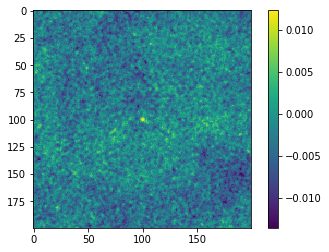

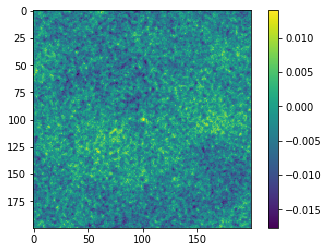

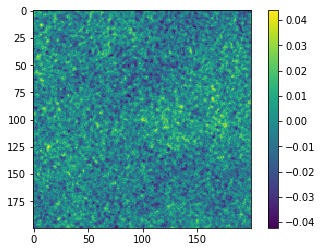

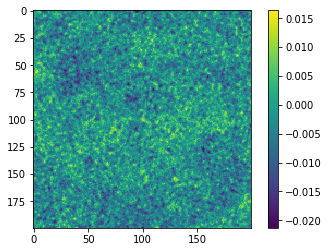

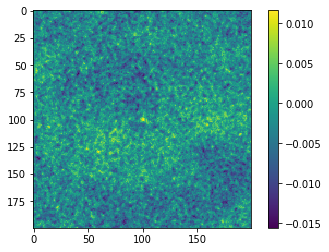

In [4]:
def load_fits(file):
    data = fits.open(file)[0].data
    return np.unravel_index(np.argmax(data, axis=None), data.shape)


if __name__ == '__main__':
    bright = load_fits('fits_mean/image1.fits')
    print(bright)

    for fits_file in os.listdir('fits_mean'): 
        hdu_list = fits.open('fits_mean/' + fits_file)
        hdu_data = hdu_list[0].data

        plt.imshow(hdu_data.T, cmap=plt.cm.viridis)
        plt.colorbar()
        plt.show()

0.017356586332122486


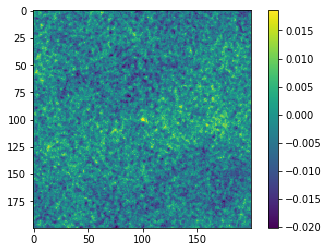

In [6]:
def mean_fits(files):
    """Calculate mean of the given set of fits files."""
    sum_data = sum(fits.open(file)[0].data for file in files)
    return sum_data/len(files)


if __name__ == '__main__':
    fits_files = ['image0.fits', 'image1.fits', 'image2.fits']
    fits_data = mean_fits(['fits_mean/' + file for file in fits_files])
    print(fits_data[100, 100])

    plt.imshow(fits_data.T, cmap=plt.cm.viridis)
    plt.colorbar()
    plt.show()

In [7]:
import time
import statistics

import numpy as np
from astropy.io import fits

In [10]:
def list_stats(data):
    """Compute median and mean."""
    data.sort()
    mean = sum(data)/len(data)
    mid = len(data)//2
    if len(data) % 2 == 0:
        median = (data[mid - 1] + data[mid])/2
    else:
        median = data[mid]
    return median, mean


if __name__ == '__main__':
    m = list_stats([1.3, 2.4, 20.6, 0.99, 3.1, 2])
    print(m)

    m = list_stats([3])
    print(m)

(2.2, 5.065)
(3, 3.0)


In [11]:
def time_stat(func, size, n_trials):
    results = []
    for _ in range(n_trials):
        data = np.random.rand(size)
        start = time.perf_counter()
        func(data)
        end = time.perf_counter() - start
        results.append(end)
    return np.mean(results)

if __name__ == '__main__':
    template = '%.6fs for %s'
    statistics_mean = time_stat(statistics.mean, 10**5, 10)
    np_mean = time_stat(np.mean, 10**5, 2000)
    
    print(template % (statistics_mean, 'statistics_mean'))
    print(template % (np_mean, 'np_mean'))

0.234108s for statistics_mean
0.000086s for np_mean


In [12]:
def median_fits(files):
    """Return median, time and memory."""
    start = time.perf_counter()
    arrays = [fits.open(file)[0].data for file in files]
    median = np.median(arrays, axis=0)
    memory = sum(array.nbytes for array in arrays)/1024
    end = time.perf_counter() - start
    return median, end, memory


if __name__ == '__main__':
    result = median_fits(['fits_median/image0.fits',
                          'fits_median/image1.fits'])
    print(result[0][100, 100], result[1], result[2])
  
    result = median_fits(['fits_median/image%s.fits' % i for i in range(12)])
    print(result[0][100, 100], result[1], result[2])

0.012338057160377502 0.11685629999999492 625.0
0.012102657463401556 0.10903819999998632 3750.0


In [5]:
def import_super(file='week2/super.csv'):
    result = []
    data = np.loadtxt(file, delimiter=',', skiprows=1,
                      usecols=[0, 1])
    for i, row in enumerate(data, 1):
        ascension = row[0]
        declination = row[1]
        result.append((i, ascension, declination))
    return result

super_cat = import_super()

print(super_cat)

[(1, 1.0583407, -52.9162402), (2, 2.6084425, -41.5005753), (3, 2.7302499, -27.706955)]


In [6]:
import psycopg2
import pandas as pd

ModuleNotFoundError: No module named 'psycopg2'

In [12]:
import subprocess
subprocess.check_call(["python", '-m', 'pip', 'install', '']) # install pkg

0

### Calculating Redshifts of galaxies

Classification of stars is based purely on observational properties of stars and galaxies is an empirical result that can survive regardless of changes in the theoretical interpretations. Secondly, the amount of information I need to process if I treat each star or galaxy from a large survey as an individual is so overwhelming as to be nearly useless. Classification allows us to draw meaningful conclusions from data by abstracting it into categories. Machine learning algorithms are a class of algorithms that can improve their performance as they're exposed to more data. I am using machine learning to calculate the red shift of galaxies from their measured colors. This is because many galaxies have not been observed spectroscopically, we have only images. I assign a star as Cepheid variable, which change its brightness at very regular rate. The period of brightness variation tells how intrinsically bright the star is. I compare how brighter the Cepheid variable star looks from Earth with its intrinsic brightness that is deduced from its period and work out how far away it actually is. I will use decision trees to analyse images from Sloan Sky Digital Survey. I start with a smaple of galaxies I already know the answer for. These are the galaxies with measured spectroscopic red shifts. I will also use the help of Galaxy Zoo which is a massive citizen source project that has made scientifc discoveries through the work of intelligent machine learning methods. The next step, is to extract features that represent my input data in some way. I can use manual classification scheme. I use colours measured by comparing the magnitudes from five different Sloan filters. U, G, R, I and Z. Each filter measures the light from the galaxy in a particular wavelength range. To check the accuracy of the model I use n-fold cross-validation. I split my sample of galaxies with known redshifts into ten sets or folds, which are usually chosen randomly divide it into training and testing set to check the accuracy. I make temperature a real-valued feature. The model needs to make decisions in the real value temperature space. After that I took a large set of galaxies for which I have measured accurate spectroscopic red shifts and derived four photometric colors from this magnitudes. I then train a decision tree regressor that builds a model mapping the features, in this case the four colours. 

In [13]:
import numpy as np
import pydotplus as pydotplus
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [14]:
def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    
    return features, data['redshift']


def main():
    data = np.load('week5/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    print(features[:2])
    print(targets[:2])


if __name__ == "__main__":
    main()

[[0.31476 0.0571  0.28991 0.07192]
 [1.2002  0.82026 0.45294 0.24665]]
[0.539301  0.1645703]


In [16]:
def main():
    # load the data and generate the features and targets
    data = np.load('week5/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # initialize model
    dtr = DecisionTreeRegressor()
    
    # train the model
    dtr.fit(features, targets)
    
    # make predictions using the same features
    predictions = dtr.predict(features)
    
    # print out the first 4 predicted redshifts
    print(predictions[:4])


if __name__ == '__main__':
    main()

[0.539301   0.1645703  0.04190006 0.04427702]


In [17]:
def median_diff(predicted, actual):
    return np.median(np.abs(predicted - actual))


def main():
    targets = np.load('data1/targets.npy')
    predictions = np.load('data1/predictions.npy')
    diff = median_diff(predictions, targets)
    print("Median difference: {:0.3f}".format(diff))


# The data wasn't provided
if __name__ == "__tbd__":
    main()

In [18]:
# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff
def validate_model(model, features, targets):
    # split the data into training and testing features and predictions
    split = 2*features.shape[0]//3
    train_features = features[:split]
    test_features = features[split:]
    
    train_targets = targets[:split]
    test_targets = targets[split:]

    # train the model
    model.fit(train_features, train_targets)

    # get the predicted_redshifts
    predictions = model.predict(test_features)
  
    # use median_diff function to calculate the accuracy
    return median_diff(test_targets, predictions)


def main():
    data = np.load('week5/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # initialize model
    dtr = DecisionTreeRegressor()

    # validate the model and print the med_diff
    diff = validate_model(dtr, features, targets)
    print('Median difference: {:f}'.format(diff))


if __name__ == "__main__":
    main()

Median difference: 0.021583


In [19]:
def main():
    data = np.load('week5/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # Initialize model
    dtr = DecisionTreeRegressor(max_depth=3)    # We will come to this input in the next tutorial

    # Split the data into training and testing
    split_index = int(0.5 * len(features))
    train_features = features[:split_index]
    train_targets = targets[:split_index]

    dtr.fit(train_features, train_targets)

    dot_data = export_graphviz(dtr, out_file=None,feature_names=['u - g', 'g - r', 'r - i', 'i - z'])
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_jpg("tree.jpg")


if __name__ == "__main__":
    main()

InvocationException: GraphViz's executables not found

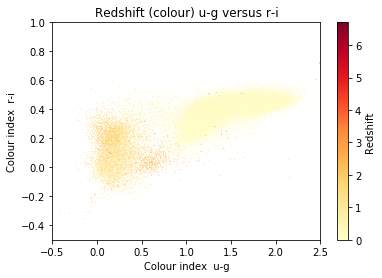

In [20]:
def main():
    data = np.load('week5/sdss_galaxy_colors.npy')
    # Get a colour map
    cmap = plt.get_cmap('YlOrRd')

    # Define our colour indexes u-g and r-i
    u_g = data['u'] - data['g']
    r_i = data['r'] - data['i']

    # Make a redshift array
    redshift = data['redshift']

    # Create the plot with plt.scatter
    plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

    cb = plt.colorbar(plot)
    cb.set_label('Redshift')

    # Define your axis labels and plot title
    plt.xlabel('Colour index  u-g')
    plt.ylabel('Colour index  r-i')
    plt.title('Redshift (colour) u-g versus r-i')

    # Set any axis limits
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1)

    plt.show()

    
if __name__ == "__main__":
    main()

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

Depth with lowest median difference : 21


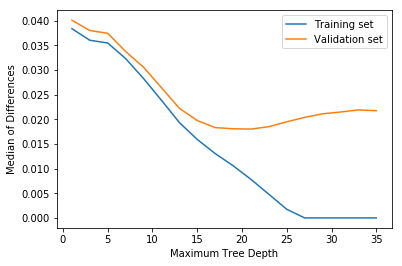

In [22]:
def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    
    return features, data['redshift']


def median_diff(predicted, actual):
    return np.median(np.abs(predicted - actual))


def accuracy_by_treedepth(features, targets, depths):
    # split the data into testing and training sets
    split_index = int(0.5 * len(features))
    train_features = features[:split_index]
    test_features = features[split_index:]
    
    train_targets = targets[:split_index]
    test_targets = targets[split_index:]

    # initialise arrays or lists to store the accuracies for the below loop
    train_accuracy = []
    test_accuracy = []

    # loop through depths
    for depth in depths:
        # initialize model with the maximum depth. 
        dtr = DecisionTreeRegressor(max_depth=depth)
    
        # train the model using the training set
        dtr.fit(train_features, train_targets)
    
        # get predictions for the training set and calculate their median_diff
        train_predictions = dtr.predict(train_features)
        train_median_diff = median_diff(train_targets, train_predictions)
        train_accuracy.append(train_median_diff)
    
        # get predictions for the testing set and calculate their median_diff
        test_predictions = dtr.predict(test_features)
        test_median_diff = median_diff(test_targets, test_predictions)
        test_accuracy.append(test_median_diff)
        
    # return the accuracies for the training and testing sets
    return train_accuracy, test_accuracy


def main():
    data = np.load('week5/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # Generate several depths to test
    tree_depths = [i for i in range(1, 36, 2)]

    # Call the function
    train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
    print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))

    # Plot the results
    train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
    test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
    plt.xlabel("Maximum Tree Depth")
    plt.ylabel("Median of Differences")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()

In [23]:
def cross_validate_model(model, features, targets, k):
    kf = KFold(n_splits=k, shuffle=True)

    # initialise a list to collect median_diffs for each iteration of the loop
    # below
    accuracy = []

    for train_indices, test_indices in kf.split(features):
        train_features = features[train_indices]
        test_features = features[test_indices]
        train_targets = targets[train_indices]
        test_targets = targets[test_indices]
        
        # fit the model for the current set
        model.fit(train_features, train_targets)
        
        # predict using the model
        prediction = model.predict(test_features)
     
        # calculate the median_diff from predicted values and append to
        # results array
        accuracy.append(median_diff(prediction, test_targets))
 
    # return the list with your median difference values
    return accuracy


def main():
    data = np.load('week5/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # initialize model with a maximum depth of 19
    dtr = DecisionTreeRegressor(max_depth=19)

    # call your cross validation function
    diffs = cross_validate_model(dtr, features, targets, 10)

    # Print the values
    print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
    print('Mean difference: {:.3f}'.format(np.mean(diffs)))


if __name__ == '__main__':
    main()

Differences: 0.018, 0.017, 0.017, 0.018, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017
Mean difference: 0.017


Median difference: 0.017


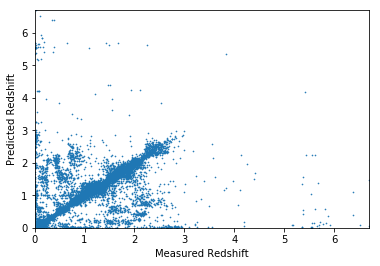

In [25]:
def cross_validate_predictions(model, features, targets, k):
    kf = KFold(n_splits=k, shuffle=True)

    # declare an array for predicted redshifts from each iteration
    all_predictions = np.zeros_like(targets)

    for train_indices, test_indices in kf.split(features):
        # split the data into training and testing
        train_features = features[train_indices]
        test_features = features[test_indices]
        train_targets = targets[train_indices]
    
        # fit the model for the current set
        model.fit(train_features, train_targets)
        
        # predict using the model
        predictions = model.predict(test_features)
        
        # put the predicted values in the all_predictions array defined above
        all_predictions[test_indices] = predictions

    # return the predictions
    return all_predictions    


def main():
    data = np.load('week5/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # initialize model
    dtr = DecisionTreeRegressor(max_depth=19)

    # call your cross validation function
    predictions = cross_validate_predictions(dtr, features, targets, 10)

    # calculate and print the rmsd as a sanity check
    diffs = median_diff(predictions, targets)
    print('Median difference: {:.3f}'.format(diffs))

    # plot the results to see how well our model looks
    plt.scatter(targets, predictions, s=0.4)
    plt.xlim((0, targets.max()))
    plt.ylim((0, predictions.max()))
    plt.xlabel('Measured Redshift')
    plt.ylabel('Predicted Redshift')
    plt.show()


if __name__ == "__main__":
    main()

In [28]:
def split_galaxies_qsos(data):
    # split the data into galaxies and qsos arrays
    galaxies = data[data['spec_class'] == b'GALAXY']
    qsos = data[data['spec_class'] == b'QSO']

    # return the separated galaxies and qsos arrays
    return galaxies, qsos


def cross_validate_median_diff(data):
    features, targets = get_features_targets(data)
    dtr = DecisionTreeRegressor(max_depth=19)
    return np.mean(cross_validate_model(dtr, features, targets, 10))


def main():
    data = np.load('week5/sdss_galaxy_colors.npy')

    # Split the data set into galaxies and QSOs
    galaxies, qsos = split_galaxies_qsos(data)

    # Cross validate the model and get the cross-validated median difference
    # The cross_validated_med_diff function is in "written_functions"
    galaxy_med_diff = cross_validate_median_diff(galaxies)
    qso_med_diff = cross_validate_median_diff(qsos)

    # Print the results
    print("Median difference for Galaxies: {:.3f}".format(galaxy_med_diff))
    print("Median difference for QSOs: {:.3f}".format(qso_med_diff))


if __name__ == "__main__":
    main()

Median difference for Galaxies: 0.016
Median difference for QSOs: 0.075


### Visualising the images for shapes of galaxies

The process of classification involves sorting throughout the images, identify key features of each galaxy. The more conspicuous examples of each type where then used as what we now call archetypes of each class. And the other galaxies were compared to them in order to classify them. I took help of Hubble tuning diagram.In this scheme, Hubble described the visual properties of galaxies, their morphology or shape, ranging from regular, elliptical and spiral shaped galaxies, to what appeared to be irregular collections of stars and gas and also some physical properties of galaxies such as star formation rate, which help us understand galaxy formation and evolution. I used Random forest to classify galaxies from SDSS. The decision tree algorithm uses  training set to build a model to map these features to the correct classifications. I used ten fold cross validation to evaluate accuracy of classifier before applying it to the unknown data. Perhaps the simplest option would just be to use every pixel in the image for every galaxy. But this will be very time consuming and inefficient. I am basically interested in three features of the galaxy. The first one is the colour because it indicates age of the stars in each galaxy. A second one is the ellipticity of the galaxy by fitting an ellipse to its profile and then using the ratio of semi-major to semi-minor axes to characterize the shape. And Finally, the luminosity profile of the galaxy. This is a measure of how the brightness of a galaxy varies as a function of the radius from its center

In [29]:
import itertools
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [30]:
def splitdata_train_test(data, fraction_training):
    # Shuffle the data
    np.random.shuffle(data)
    
    # Split the data
    limit = int(len(data)*fraction_training)
    training = data[0:limit]
    testing = data[limit:]
    
    return training, testing


def main():
    data = np.load('week6/galaxy_catalogue.npy')

    # set the fraction of data which should be in the training set
    fraction_training = 0.7

    # split the data using your function
    training, testing = splitdata_train_test(data, fraction_training)

    # print the key values
    print('Number data galaxies:', len(data))
    print('Train fraction:', fraction_training)
    print('Number of galaxies in training set:', len(training))
    print('Number of galaxies in testing set:', len(testing))


if __name__ == "__main__":
    main()

Number data galaxies: 780
Train fraction: 0.7
Number of galaxies in training set: 546
Number of galaxies in testing set: 234


In [31]:
def generate_features_targets(data):
    targets = data['class']

    features = np.empty(shape=(len(data), 13))
    features[:, 0] = data['u-g']
    features[:, 1] = data['g-r']
    features[:, 2] = data['r-i']
    features[:, 3] = data['i-z']
    features[:, 4] = data['ecc']
    features[:, 5] = data['m4_u']
    features[:, 6] = data['m4_g']
    features[:, 7] = data['m4_r']
    features[:, 8] = data['m4_i']
    features[:, 9] = data['m4_z']

    # concentration in u filter
    features[:, 10] = data['petroR50_u']/data['petroR90_u']
    # concentration in r filter
    features[:, 11] = data['petroR50_r']/data['petroR90_r']
    # concentration in z filter
    features[:, 12] = data['petroR50_z']/data['petroR90_z']

    return features, targets


def main():
  data = np.load('week6/galaxy_catalogue.npy')

  features, targets = generate_features_targets(data)

  # The shape of each array to check the arrays are the correct dimensions 
  print("Features shape:", features.shape)
  print("Targets shape:", targets.shape)


if __name__ == "__main__":
    main()

Features shape: (780, 13)
Targets shape: (780,)


In [32]:
def dtc_predict_actual(data):
    # split the data into training and testing sets using a training
    # fraction of 0.7
    training, testing = splitdata_train_test(data, 0.7)

    # generate the feature and targets for the training and test sets
    # i.e. train_features, train_targets, test_features, test_targets
    train_features, train_targets = generate_features_targets(training)
    test_features, test_targets = generate_features_targets(testing)

    # instantiate a decision tree classifier
    dtr = DecisionTreeClassifier()

    # train the classifier with the train_features and train_targets
    dtr.fit(train_features, train_targets)

    # get predictions for the test_features
    predictions = dtr.predict(test_features)

    # return the predictions and the test_targets
    return predictions, test_targets


def main():
    data = np.load('week6/galaxy_catalogue.npy')
    
    predicted_class, actual_class = dtc_predict_actual(data)

    # Print some of the initial results
    print("Some initial results...\n   predicted,  actual")
    for i in range(10):
        print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))


if __name__ == '__main__':
    main()

Some initial results...
   predicted,  actual
0. elliptical, elliptical
1. elliptical, elliptical
2. elliptical, elliptical
3. spiral, spiral
4. elliptical, elliptical
5. merger, merger
6. spiral, spiral
7. spiral, spiral
8. elliptical, elliptical
9. spiral, spiral


Our accuracy score: 0.7858974358974359
Confusion matrix, without normalization
[[181  53  26]
 [ 56 197   7]
 [ 21   4 235]]


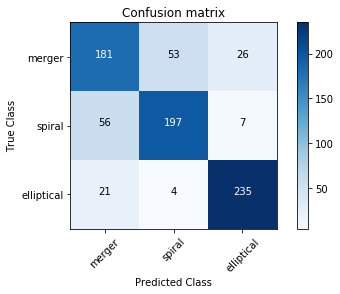

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')


def calculate_accuracy(predicted, actual):
    correct = sum(predicted == actual)
    return correct/(len(predicted))


def main():
    data = np.load('week6/galaxy_catalogue.npy')

    # split the data
    features, targets = generate_features_targets(data)

    # train the model to get predicted and actual classes
    dtc = DecisionTreeClassifier()
    predicted = cross_val_predict(dtc, features, targets, cv=10)

    # calculate the model score using your function
    model_score = calculate_accuracy(predicted, targets)
    print("Our accuracy score:", model_score)

    # calculate the models confusion matrix using sklearns confusion_matrix
    class_labels = list(set(targets))
    model_cm = confusion_matrix(y_true=targets, y_pred=predicted,
                                labels=class_labels)

    # Plot the confusion matrix using the provided functions.
    plt.figure()
    plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
    plt.show()


if __name__ == "__main__":
    main()

Accuracy score: 0.8705128205128205
Confusion matrix, without normalization
[[211  31  18]
 [ 36 222   2]
 [ 13   1 246]]


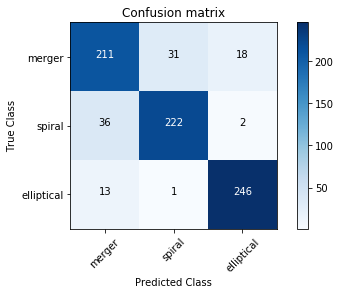

In [34]:
def rf_predict_actual(data, n_estimators):
    # generate the features and targets
    features, targets = generate_features_targets(data)

    # instantiate a random forest classifier using n estimators
    rfc = RandomForestClassifier(n_estimators=n_estimators)
  
    # get predictions using 10-fold cross validation with cross_val_predict
    predicted = cross_val_predict(rfc, features, targets, cv=10)

    # return the predictions and their actual classes
    return predicted, targets


def main():
    data = np.load('week6/galaxy_catalogue.npy')

    # get the predicted and actual classes
    number_estimators = 50              # Number of trees
    predicted, actual = rf_predict_actual(data, number_estimators)

    # calculate the model score using your function
    accuracy = calculate_accuracy(predicted, actual)
    print("Accuracy score:", accuracy)

    # calculate the models confusion matrix using sklearns confusion_matrix
    class_labels = list(set(actual))
    model_cm = confusion_matrix(y_true=actual, y_pred=predicted,
                                labels=class_labels)

    # plot the confusion matrix using the provided functions.
    plt.figure()
    plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
    plt.show()


if __name__ == "__main__":
    main()